# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Thazkia Rahmadianissa]
- **Email:** [thazkiard@gmail.com]
- **ID Dicoding:** [Thazkia Rahmadianissa]

## Menentukan Pertanyaan Bisnis



- Apakah terdapat hubungan antara banyaknya penyewaan sepeda harian dengan suhu?
- Bagaimana demografi penyewaan sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [168]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [169]:
# Mengunggah file
uploaded = files.upload()

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

Saving bikesharing.csv to bikesharing.csv


In [170]:
print(data)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

### Assessing Data

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [172]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [173]:
#pengecekan data duplicate
data.duplicated().sum()

0

In [174]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [175]:
data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

### Cleaning Data

In [176]:
#merubah tipe data tanggal
data['dteday'] = pd.to_datetime(data['dteday'])

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [178]:
#mengganti nama kolom
data.columns = ['instant', 'date','season','year','month','holiday','weekday','workingday','weather','temp','atemp','hum','windspeed','casual','registered','count']

In [179]:
data['month'] = data['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
data['season'] = data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
data['weekday'] = data['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
data['weather'] = data['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
data['workingday'] = data['workingday'].map({
    1: 'Workingday', 0: 'Holiday'
})

In [180]:
print(data)

     instant       date  season  year month  holiday weekday  workingday  \
0          1 2011-01-01  Spring     0   Jan        0     Sat     Holiday   
1          2 2011-01-02  Spring     0   Jan        0     Sun     Holiday   
2          3 2011-01-03  Spring     0   Jan        0     Mon  Workingday   
3          4 2011-01-04  Spring     0   Jan        0     Tue  Workingday   
4          5 2011-01-05  Spring     0   Jan        0     Wed  Workingday   
..       ...        ...     ...   ...   ...      ...     ...         ...   
726      727 2012-12-27  Spring     1   Dec        0     Thu  Workingday   
727      728 2012-12-28  Spring     1   Dec        0     Fri  Workingday   
728      729 2012-12-29  Spring     1   Dec        0     Sat     Holiday   
729      730 2012-12-30  Spring     1   Dec        0     Sun     Holiday   
730      731 2012-12-31  Spring     1   Dec        0     Mon  Workingday   

                 weather      temp     atemp       hum  windspeed  casual  \
0         

## Exploratory Data Analysis (EDA)

### Explore ...

In [181]:
data.describe()

,instant,year,holiday,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [182]:
data.corr()

<ipython-input-182-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,instant,year,holiday,temp,atemp,hum,windspeed,casual,registered,count
instant,1.000000,0.866025,0.016145,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
year,0.866025,1.000000,0.007954,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,0.016145,0.007954,1.000000,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
temp,0.150580,0.047604,-0.028556,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.046106,-0.032507,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.110651,-0.015937,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.011817,0.006292,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.248546,0.054274,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.594248,-0.108745,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.628830,0.566710,-0.068348,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [183]:
data.groupby(by="season").instant.nunique()

season
Fall      188
Spring    181
Summer    184
Winter    178
Name: instant, dtype: int64

In [184]:
data.groupby(by="weather").instant.nunique()

weather
Clear/Partly Cloudy    463
Light Snow/Rain         21
Misty/Cloudy           247
Name: instant, dtype: int64

In [185]:
data.groupby(by="workingday").instant.nunique()

workingday
Holiday       231
Workingday    500
Name: instant, dtype: int64

In [186]:
data.groupby(by="weekday").instant.nunique()

weekday
Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-187-a1a6c26388a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


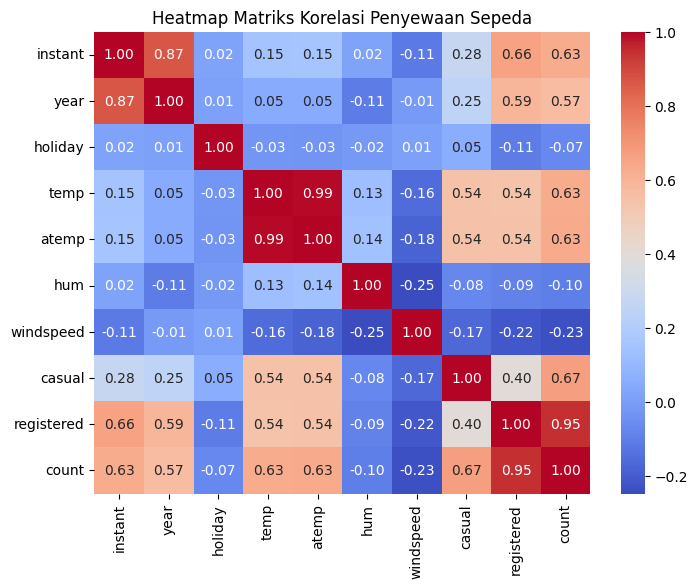

In [187]:
# Membuat matriks korelasi
correlation_matrix = data.corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Matriks Korelasi Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:

In [188]:
#berdasarkan season
data.groupby('season')['count'].nunique().reset_index()

,season,count
0,Fall,188
1,Spring,179
2,Summer,182
3,Winter,176


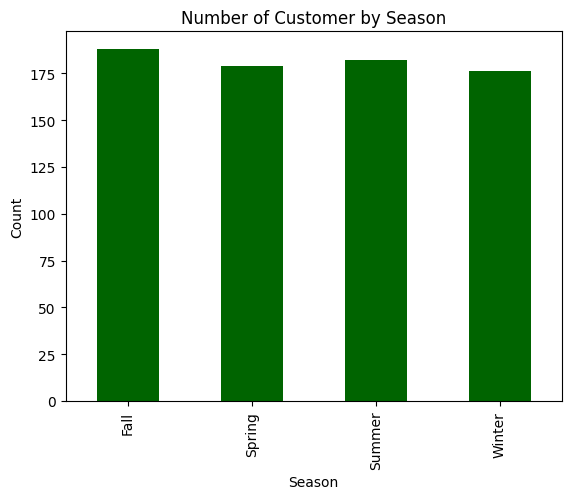

In [189]:
grouped_df = data.groupby('season')['count'].nunique()
grouped_df.plot(kind='bar',color='darkgreen')
plt.title('Number of Customer by Season')
plt.xlabel('Season')
plt.ylabel('Count')

plt.show()

In [190]:
#berdasarkan weather
data.groupby('weather')['count'].nunique().reset_index()

,weather,count
0,Clear/Partly Cloudy,451
1,Light Snow/Rain,21
2,Misty/Cloudy,243


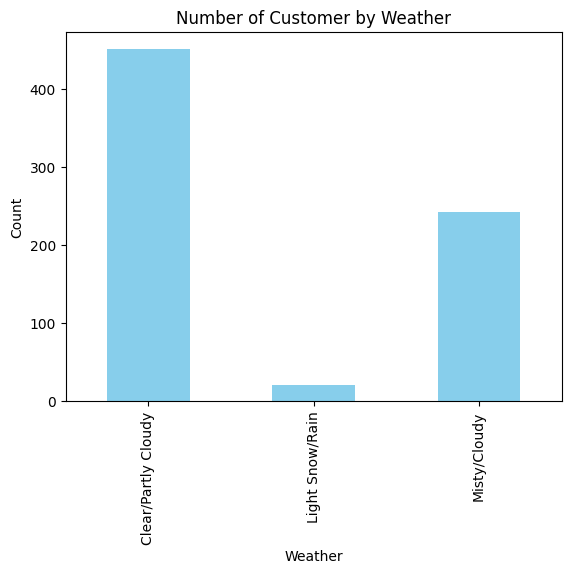

In [191]:
grouped_df = data.groupby('weather')['count'].nunique()
grouped_df.plot(kind='bar', color='skyblue')

plt.title('Number of Customer by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')

plt.show()

In [192]:
#berdasarkan workingday
data.groupby('workingday')['count'].nunique().reset_index()

,workingday,count
0,Holiday,223
1,Workingday,487


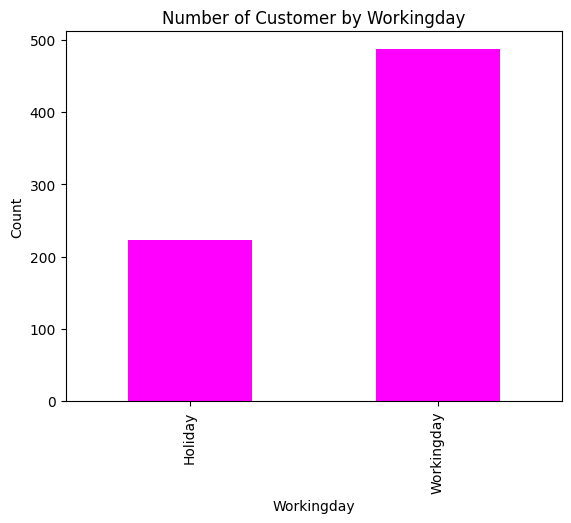

In [193]:
grouped_df = data.groupby('workingday')['count'].nunique()
grouped_df.plot(kind='bar', color='magenta')

plt.title('Number of Customer by Workingday')
plt.xlabel('Workingday')
plt.ylabel('Count')

plt.show()

In [194]:
#berdasarkan weekday
data.groupby('weekday')['count'].nunique().reset_index()

,weekday,count
0,Fri,104
1,Mon,104
2,Sat,102
3,Sun,104
4,Thu,103
5,Tue,104
6,Wed,103


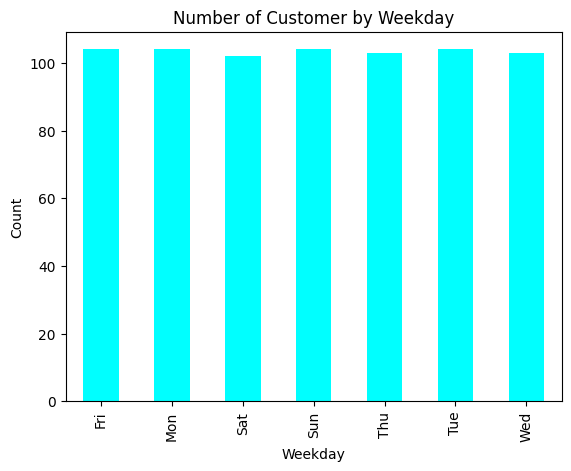

In [195]:
grouped_df = data.groupby('weekday')['count'].nunique()
grouped_df.plot(kind='bar', color='cyan')

plt.title('Number of Customer by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')

plt.show()

## Conclusion

- Terdapat hubungan yang kuat antara suhu dengan banyaknya penyewaan sepeda yaitu dapat diketahui dari hasil uji korelasi yang diperoleh sebesar 0.63.
- Berdasarkan hasil eksplorasi data yang telah dilakukan, terdapat beberapa kesimpulan terkait demografi pelanggan penyewaan sepeda, yaitu :
1. berdasarkan musim, paling banyak yaitu di musim fall, sebanyak 188 kali.
2. berdasarkan cuaca, paling banyak yaitu di cuaca dengan kondisi Clear/Partly cloudy, sebanyak 451 kali.
3. berdasarkan hari kerja, paling banyak di hari kerja, sebanyak 487 kali.
4. berdasarkan hari, paling banyak di hari Minggu, Senin, Selasa, Jumat, yaitu sebanyak 104 kali.